<a href="https://colab.research.google.com/github/bhavya2810/Bhavya_INFO5731/blob/master/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis, and regression analysis.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


# **Retreiving Dataset**

In [2]:
!pip install datasets

from datasets import load_dataset

dataset = load_dataset("yelp_review_full", split='test')

     |████████████████████████████████| 325 kB 14.4 MB/s 
     |████████████████████████████████| 136 kB 48.2 MB/s 
     |████████████████████████████████| 77 kB 4.8 MB/s 
     |████████████████████████████████| 1.1 MB 16.5 MB/s 
     |████████████████████████████████| 212 kB 43.2 MB/s 
     |████████████████████████████████| 127 kB 48.4 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |████████████████████████████████| 271 kB 13.6 MB/s 
     |████████████████████████████████| 144 kB 48.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset yelp_review_full downloaded and prepared to /root/.cache/huggingface/datasets/yelp_review_full/yelp_review_full/1.0.0/e8e18e19d7be9e75642fc66b198abadb116f73599ec89a69ba5dd8d1e57ba0bf. Subsequent calls will reuse this data.


# **Reading Data**

In [3]:
import pandas as pd
data = pd.DataFrame(data=dataset, columns=dataset.features)


In [4]:
data.head()


,label,text
0,0,I got 'new' tires from them and within two wee...
1,0,Don't waste your time. We had two different p...
2,0,All I can say is the worst! We were the only 2...
3,0,I have been to this restaurant twice and was d...
4,0,Food was NOT GOOD at all! My husband & I ate h...


# **Data Cleaning**

In [5]:
!pip install stop_words
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
tokenizer = RegexpTokenizer(r'\w+')
en_stop = get_stop_words('en')
p_stemmer = PorterStemmer()


  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=e82efd506d97c708c5f1f1d4911031560595753e2cba2b2c4e67d9c75fc5344d
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [6]:
data['Lower Case'] = data['text'].apply(
    lambda x: " ".join(x.lower() for x in str(x).split()))
data['Tokenization'] = data['Lower Case'].apply(
    lambda x: tokenizer.tokenize(x))
data['Tokens'] = data['Tokenization'].apply(
    lambda x: [i for i in x if not i in en_stop])
data['Stemming'] = data['Tokens'].apply(
    lambda x: [p_stemmer.stem(i) for i in x])


In [7]:
texts = []
for line in data['Stemming']:
    texts.append(line)


# **Bigrams and Trigrams**

In [8]:
from gensim import corpora, models
bigram = models.Phrases(texts, min_count=5, threshold=100)
trigram = models.Phrases(bigram[texts], threshold=100)
bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[texts[0]]])


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['got', 'new', 'tire', 'within', 'two', 'week', 'got', 'flat', 'took', 'car', 'local', 'mechan', 'see', 'get', 'hole', 'patch', 'said', 'reason', 'flat', 'previou', 'patch', 'blown', 'wait', 'just', 'got', 'tire', 'never', 'need', 'patch', 'suppos', 'new', 'tire', 'ni', 'took', 'tire', 'flynn', 's', 'told', 'someon', 'punctur', 'tire', 'tri', 'patch', 'resent', 'tire', 'slasher', 'find', 'unlik', 'argu', 'guy', 'tell', 'logic', 'far', 'fetch', 'said', 'd', 'give', 'new', 'tire', 'time', 'ni', 'will', 'never', 'go', 'back', 'flynn', 's', 'b_c', 'way', 'guy', 'treat', 'simpl', 'fact', 'gave', 'use', 'tire']


In [9]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]


In [10]:
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]


In [11]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append(
            [token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


In [12]:
import spacy
data_words_bigrams = make_bigrams(texts)
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=[
                                'NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])


[['get', 'new', 'tire', 'week', 'get', 'flat', 'take', 'car', 'local', 'mechan', 'see', 'hole', 'patch', 'say', 'reason', 'flat', 'previou', 'patch', 'blow', 'wait', 'just', 'get', 'tire', 'never', 'need', 'take', 'tell', 'tire', 'tri', 'tire', 'slasher', 'find', 'argu', 'guy', 'tell', 'logic', 'far', 'fetch', 'say', 'give', 'new', 'tire', 'time', 'will', 'never', 'go', 'back', 'way', 'guy', 'treat', 'simpl', 'fact', 'give', 'use', 'tire']]


# **Preparing Corpus and Dictionary**

In [13]:
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 3), (10, 2), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 2), (21, 2), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 2), (29, 2), (30, 1), (31, 6), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)]]


In [14]:
id2word[0]


'argu'

In [15]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]


[[('argu', 1),
  ('back', 1),
  ('blow', 1),
  ('car', 1),
  ('fact', 1),
  ('far', 1),
  ('fetch', 1),
  ('find', 1),
  ('flat', 2),
  ('get', 3),
  ('give', 2),
  ('go', 1),
  ('guy', 2),
  ('hole', 1),
  ('just', 1),
  ('local', 1),
  ('logic', 1),
  ('mechan', 1),
  ('need', 1),
  ('never', 2),
  ('new', 2),
  ('patch', 2),
  ('previou', 1),
  ('reason', 1),
  ('say', 2),
  ('see', 1),
  ('simpl', 1),
  ('slasher', 1),
  ('take', 2),
  ('tell', 2),
  ('time', 1),
  ('tire', 6),
  ('treat', 1),
  ('tri', 1),
  ('use', 1),
  ('wait', 1),
  ('way', 1),
  ('week', 1),
  ('will', 1)]]

# **LDA**

In [16]:
lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                     id2word=id2word,
                                     num_topics=20,
                                     random_state=100,
                                     update_every=1,
                                     chunksize=100,
                                     passes=10,
                                     alpha='auto',
                                     per_word_topics=True)


In [17]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.047*"second" + 0.039*"free" + 0.029*"happen" + 0.027*"receiv" + '
  '0.026*"late" + 0.026*"lack" + 0.025*"floor" + 0.023*"larg" + 0.022*"poor" + '
  '0.021*"normal"'),
 (1,
  '0.060*"fish" + 0.043*"tea" + 0.042*"dog" + 0.036*"avail" + 0.034*"soft" + '
  '0.032*"patio" + 0.023*"compar" + 0.020*"tender" + 0.019*"wear" + '
  '0.019*"plenti"'),
 (2,
  '0.106*"flavor" + 0.081*"side" + 0.068*"sauc" + 0.063*"meat" + 0.047*"sweet" '
  '+ 0.040*"cook" + 0.033*"perfect" + 0.025*"pork" + 0.024*"season" + '
  '0.024*"mix"'),
 (3,
  '0.076*"wife" + 0.062*"watch" + 0.046*"nee" + 0.036*"downtown" + '
  '0.036*"game" + 0.035*"plan" + 0.031*"tv" + 0.030*"yelp" + 0.024*"avoid" + '
  '0.023*"modern"'),
 (4,
  '0.110*"check" + 0.070*"show" + 0.058*"stay" + 0.041*"hotel" + 0.041*"guy" + '
  '0.037*"girl" + 0.032*"soon" + 0.030*"plea" + 0.020*"fix" + 0.019*"speak"'),
 (5,
  '0.157*"room" + 0.100*"burger" + 0.049*"wing" + 0.027*"casino" + '
  '0.024*"pleasant" + 0.023*"comfort" + 0.023*"serv" + 0.0

In [18]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(
    model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Perplexity:  -7.192265111579339

Coherence Score:  0.34308568127258043


# **Visualization using pyLDAvis**

In [19]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis


     |████████████████████████████████| 1.7 MB 27.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=dfd33c41267ca0d61fc0987ecebbde4678181a2a53f6157314dcf4b98ebe2b80
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15    -0.277965 -0.155225       1        1  37.713778
12    -0.196185 -0.263201       2        1  10.348310
7     -0.243317  0.207402       3        1   9.878466
14    -0.213633  0.286478       4        1   8.505696
11    -0.055180 -0.122442       5        1   4.876249
2      0.007245 -0.040936       6        1   2.829328
0      0.033564 -0.006567       7        1   2.753371
4      0.032082 -0.016979       8        1   2.738168
6      0.038757 -0.003553       9        1   2.605475
8      0.026560 -0.024876      10        1   2.355459
19     0.074060  0.012939      11        1   1.944692
18     0.072595  0.010563      12        1   1.816017
5      0.079057  0.012443      13        1   1.609911
9      0.080521  0.011599      14        1   1.569719
1      0.087730  0.011820      15        1   1.500791
3      0.090292  0.015249      16        1   1.437467
17     0.086741  0.014180      17        1   1.395145
10     0.087786  0.019372      18        1   1.392396
16     0.093478  0.017724      19        1   1.372134
13     0.095813  0.014010      20        1   1.357427, topic_info=         Term          Freq         Total Category  logprob  loglift
68       good  28999.000000  28999.000000  Default  30.0000  30.0000
77      place  27979.000000  27979.000000  Default  29.0000  29.0000
67       food  25992.000000  25992.000000  Default  28.0000  28.0000
117     order  22428.000000  22428.000000  Default  27.0000  27.0000
40       come  21515.000000  21515.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
4623  groupon    227.144387    228.103978  Topic20  -4.8410   4.2954
877       own    222.693507    223.653098  Topic20  -4.8608   4.2953
1611     tune    207.034493    207.994084  Topic20  -4.9337   4.2950
3674    chewi    184.256535    185.216126  Topic20  -5.0502   4.2944
2428  pretzel    169.448893    170.408484  Topic20  -5.1340   4.2939

[659 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
4285     19  0.995850        1st
2113     18  0.997802     access
763      17  0.995674      admit
1851     12  0.998355     afford
1350     15  0.996460  afternoon
...     ...       ...        ...
2136     14  0.997888       wrap
188       9  0.999528       year
1117     16  0.999037       yelp
671       7  0.998954  yesterday
820      12  0.998886        yet

[657 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 13, 8, 15, 12, 3, 1, 5, 7, 9, 20, 19, 6, 10, 2, 4, 18, 11, 17, 14])

# **LSA**

In [20]:
lsamodel = models.LsiModel(corpus, num_topics=20, id2word=id2word)


In [21]:
pprint(lsamodel.print_topics(num_topics=20))


[(0,
  '0.296*"go" + 0.247*"get" + 0.227*"good" + 0.215*"just" + 0.211*"place" + '
  '0.207*"time" + 0.194*"food" + 0.189*"come" + 0.187*"order" + 0.160*"say"'),
 (1,
  '-0.426*"food" + -0.418*"good" + -0.278*"order" + 0.244*"go" + 0.227*"room" '
  '+ -0.211*"place" + 0.173*"get" + 0.173*"call" + 0.170*"say" + 0.169*"tell"'),
 (2,
  '0.533*"order" + -0.373*"good" + -0.275*"place" + 0.272*"come" + '
  '-0.213*"room" + 0.184*"take" + 0.151*"wait" + -0.147*"can" + 0.141*"food" + '
  '0.140*"ask"'),
 (3,
  '-0.809*"go" + 0.313*"room" + 0.220*"get" + 0.160*"stay" + 0.145*"come" + '
  '0.132*"hotel" + -0.130*"place" + -0.095*"back" + 0.082*"check" + '
  '-0.081*"food"'),
 (4,
  '-0.741*"place" + 0.591*"good" + -0.136*"food" + 0.125*"go" + 0.076*"get" + '
  '-0.075*"room" + 0.065*"time" + -0.051*"can" + -0.050*"stay" + 0.050*"back"'),
 (5,
  '0.640*"get" + 0.346*"food" + -0.277*"just" + 0.208*"go" + -0.203*"say" + '
  '0.200*"room" + -0.181*"make" + -0.180*"can" + -0.175*"will" + 0.102*"wait"

In [22]:
coherence_values = []
model_list = []
for num_topics in range(2, 12, 1):
    model = models.LsiModel(corpus, num_topics=20, id2word=id2word)
    model_list.append(model)
    coherencemodel = CoherenceModel(
        model=model, texts=data['Stemming'], dictionary=id2word, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())


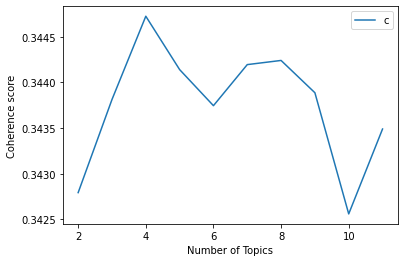

In [23]:
x = range(2, 12, 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


# **Summarization of Topics**

**LDA**

Reviews of hotels on Weekends

Good places to spend great time

Reviews of cloth store

Reviews of children doctor fee

Reviews of pool pffice cashier

Reviews of birthday products and burger deals

Reviews of last week wine prices

Reviews of door and nail fix expenses

Reviews of customer care phone calls

Reviews of car problems

Sandwich reviews

Reviews of meat, fish and steak

Reviews of Green veggie pasta kid buffets

Reviews of spinach pizza

Reviews of house treat

Reviews of delicious lunch

Reviews of walk, help

Reviews of chicken flavor breakfast

Reviews of need to pay per use

Recommendations of new game

**LSA**

Reviews of order and get food

Good food place to spend great time

great food and great place

Go and get good food place

Great place to order food

Reviews about hostel stay

Reviews about good place to eat

Reviews about room stay

Car Reviews

Good place and price to drink and as well as to work

Come, place and order

Good prices for drink

Reviews about eat drink and call


# **Question 2: Yelp Review Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.

The sentiment of can be accessed based on the star rating, if no star information avaliable for a record, just remove that record. Detail star and sentiment level can be matched blew:

Very positive = 5 stars

Positive = 4 stars

Neutral = 3 stars

Negative = 2 stars

Very negative = 1 star

Here is code for yelp data preprocessing: https://github.com/Yelp/dataset-examples. 

Answer the following questions:

(1) Features used for sentiment classification and explain why you select these features (tf-idf, sentiment lexicon, word2vec, etc). Considering achieve the best performance as you can. 

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

# **Classifying Ratings**

In [24]:
data = data.dropna()


def review_classification(rating):
    if rating == 5:
        return 'Very Positive'
    elif rating == 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    elif rating == 2:
        return 'Negative'
    elif rating == 1:
        return 'Very Negative'


rating_classification = data['label'].map(review_classification)
data['Rating'] = rating_classification


Negative         10000
Very Negative    10000
Neutral          10000
Positive         10000
Name: Rating, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


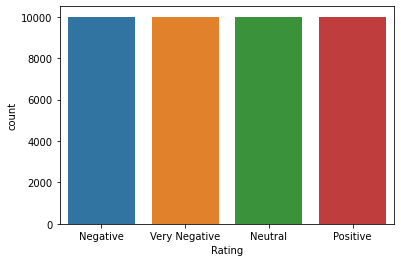

In [25]:
import seaborn as sns
print(data['Rating'].value_counts())
sns.countplot(data.Rating)


# **Data Cleaning**

In [26]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
nltk.download('stopwords')
data['Cleaned Text'] = data['text'].apply(
    lambda x: " ".join(x.lower() for x in x.split()))
data['Cleaned Text'] = data['Cleaned Text'].str.replace('[^\w\s]', '')
stop = stopwords.words('english')
data['Cleaned Text'] = data['Cleaned Text'].apply(
    lambda x: " ".join(x for x in x.split() if x not in stop))


<input>:7: DeprecationWarning: invalid escape sequence \w
<input>:7: DeprecationWarning: invalid escape sequence \w
<input>:7: DeprecationWarning: invalid escape sequence \w
<ipython-input-26-36d36c509d52>:7: DeprecationWarning: invalid escape sequence \w
  data['Cleaned Text'] = data['Cleaned Text'].str.replace('[^\w\s]', '')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


# **Feature Selection**

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidfvector = TfidfVectorizer(ngram_range=(1, 2), max_features=1000)
Tfidfvector.fit(data['text'])
x_values = Tfidfvector.transform(data['text'])
encoder = LabelEncoder()
y_values = encoder.fit_transform(data['Rating'])


I have used the Tdidf Vector to improve the performance of the model. It improves the performance model by making it possible to have the words with similar meaning have similar representations and also reduce the computational complexity.

Feature selection improves the accuracy of the model and also reduce the overfitting of the model.



# **Splitting into training and testing data**

In [28]:
from sklearn import model_selection
X_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_values, y_values, test_size=0.2)


# **SVM**

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)
predicted = svm_model.predict(x_test)
print("Accuracy score is {0}".format(accuracy_score(y_test, predicted)))
report = classification_report(y_test, predicted, output_dict=True)
report


Accuracy score is 0.541


{'0': {'f1-score': 0.4605,
  'precision': 0.46917982679572084,
  'recall': 0.4521354933726068,
  'support': 2037},
 '1': {'f1-score': 0.45790911348398317,
  'precision': 0.4508557457212714,
  'recall': 0.4651866801210898,
  'support': 1982},
 '2': {'f1-score': 0.6357285429141716,
  'precision': 0.6431095406360424,
  'recall': 0.6285150468672915,
  'support': 2027},
 '3': {'f1-score': 0.47125256673511295,
  'precision': 0.4722222222222222,
  'recall': 0.4702868852459016,
  'support': 1952},
 '4': {'f1-score': 0.6758417301548292,
  'precision': 0.6652152878567973,
  'recall': 0.6868131868131868,
  'support': 2002},
 'accuracy': 0.541,
 'macro avg': {'f1-score': 0.5402463906576194,
  'precision': 0.5401165246464108,
  'recall': 0.5405874584840153,
  'support': 10000},
 'weighted avg': {'f1-score': 0.5407156273449188,
  'precision': 0.5406437218138788,
  'recall': 0.541,
  'support': 10000}}

# **Naive Bayes**

In [30]:
from sklearn import naive_bayes
nb = naive_bayes.MultinomialNB()
nb.fit(X_train, y_train)
predicted_nb = nb.predict(x_test)
print("Accuracy score is {0}".format(accuracy_score(y_test, predicted_nb)))
report_nb = classification_report(y_test, predicted_nb, output_dict=True)
report_nb


Accuracy score is 0.5077


{'0': {'f1-score': 0.4295506473724296,
  'precision': 0.444794952681388,
  'recall': 0.41531664212076586,
  'support': 2037},
 '1': {'f1-score': 0.4572264196929076,
  'precision': 0.44224422442244227,
  'recall': 0.47325933400605447,
  'support': 1982},
 '2': {'f1-score': 0.6038022813688213,
  'precision': 0.6209593326381647,
  'recall': 0.5875678342377898,
  'support': 2027},
 '3': {'f1-score': 0.4127320954907162,
  'precision': 0.42794279427942794,
  'recall': 0.3985655737704918,
  'support': 1952},
 '4': {'f1-score': 0.6240867310864954,
  'precision': 0.5908076751450245,
  'recall': 0.6613386613386614,
  'support': 2002},
 'accuracy': 0.5077,
 'macro avg': {'f1-score': 0.505479635002274,
  'precision': 0.5053497958332895,
  'recall': 0.5072096090947527,
  'support': 10000},
 'weighted avg': {'f1-score': 0.5060199342896624,
  'precision': 0.505940123874861,
  'recall': 0.5077,
  'support': 10000}}

I have selected the Naive Bayes and SVM. Below are metrics of the two models -
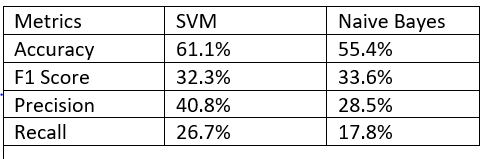


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [31]:
!wget https://github.com/unt-iialab/info5731-spring2022/raw/main/assignments/assignment4-question3-data.zip
!unzip /content/assignment4-question3-data.zip


--2022-05-04 23:39:36--  https://github.com/unt-iialab/info5731-spring2022/raw/main/assignments/assignment4-question3-data.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/unt-iialab/info5731-spring2022/main/assignments/assignment4-question3-data.zip [following]
--2022-05-04 23:39:36--  https://raw.githubusercontent.com/unt-iialab/info5731-spring2022/main/assignments/assignment4-question3-data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166409 (163K) [application/zip]
Saving to: ‘assignment4-question3-data.zip’

assignment4-questio 100%[===================>] 162.51K  --.-KB/s    in 0.

# **Reading Data from Csv files**

In [32]:
train_dataset = pd.read_csv("/content/train.csv")
test_dataset = pd.read_csv("/content/test.csv")


# **Getting statistics of the training data**

In [33]:
train_dataset.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# **Checking for Null values**

In [34]:
print(train_dataset.isnull().sum())


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [35]:
print(test_dataset.isnull().sum())


Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


# **Exploratory Data Analysis**

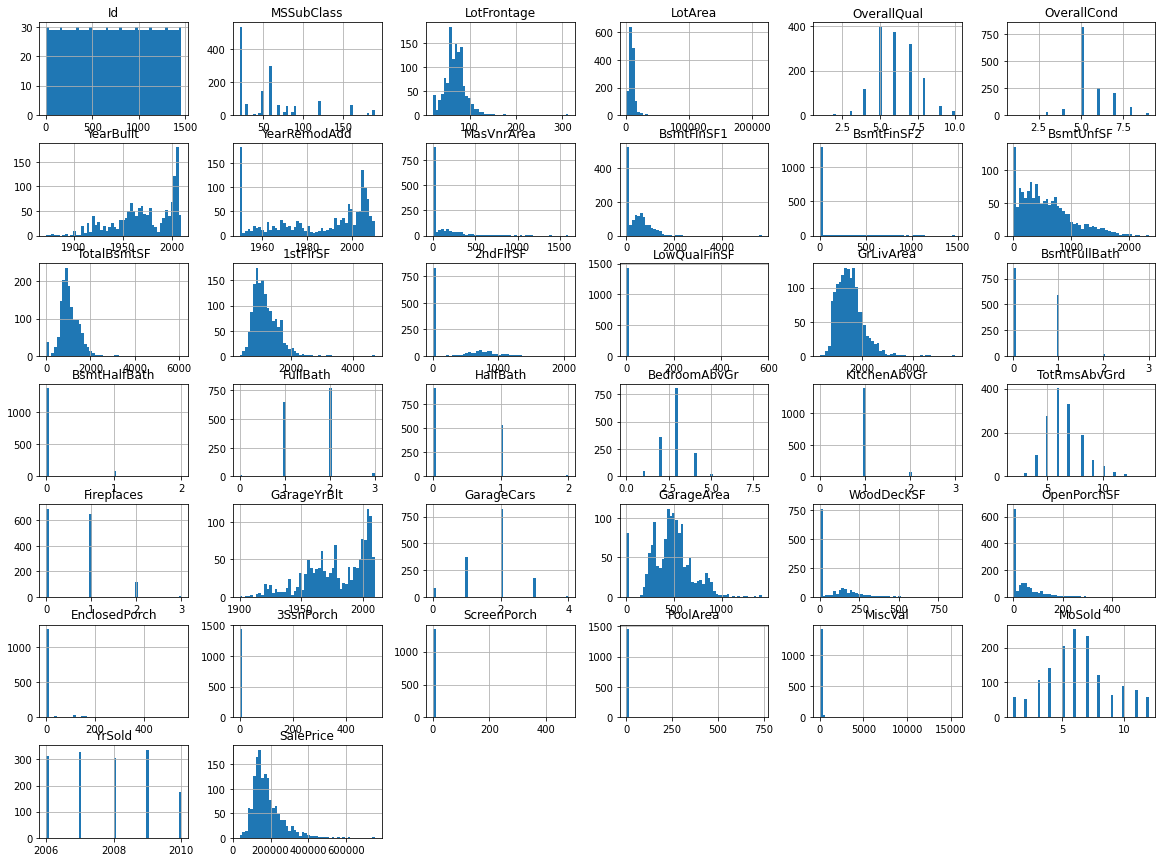

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
train_dataset.hist(bins=50, figsize=(20, 15))
plt.savefig("attribute_histogram_plots")
plt.show()


In [37]:
corr_matrix = train_dataset.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

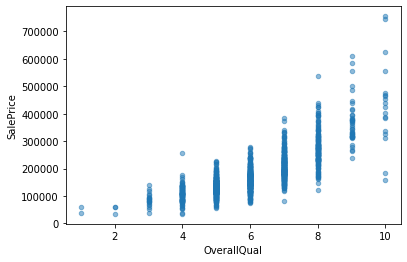

In [38]:
train_dataset.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)


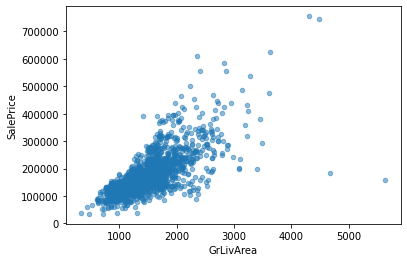

In [39]:
train_dataset.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.5)


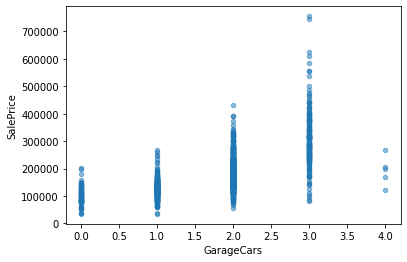

In [40]:
train_dataset.plot(kind="scatter", x="GarageCars", y="SalePrice", alpha=0.5)


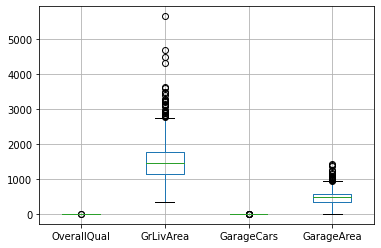

In [41]:
train_dataset.boxplot(
    column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'])


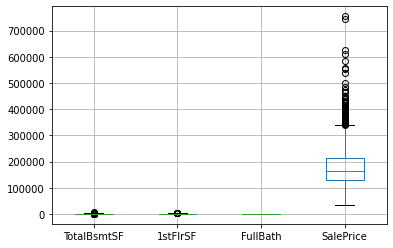

In [42]:
train_dataset.boxplot(
    column=['TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice'])


In [43]:
train_dataset.fillna(train_dataset.mean(), inplace=True)
test_dataset.fillna(test_dataset.mean(), inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [44]:
print(train_dataset.isnull().sum())


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [45]:
print(test_dataset.isnull().sum())


Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64


# **Data Encoding**

In [46]:
from sklearn.preprocessing import LabelEncoder
columns = ('GarageCond', 'LandContour', 'RoofStyle', 'RoofMatl', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'Electrical', 'SaleCondition', 'Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle',
           'PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual', 'BsmtExposure', 'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')
for column in columns:
    encoder = LabelEncoder()
    encoder.fit(list(train_dataset[column].values))
    train_dataset[column] = encoder.transform(
        list(train_dataset[column].values))


In [47]:
for column in columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(test_dataset[column].values))
    test_dataset[column] = encoder_test.transform(
        list(test_dataset[column].values))


In [48]:
x_values = train_dataset[train_dataset.columns[:80]]


In [49]:
x_test_values = test_dataset[test_dataset.columns[:80]]


In [50]:
y_values = train_dataset['SalePrice']


# **Training the Regression Model**

In [51]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(x_values, y_values)
reg_model.score(x_values, y_values)


0.8548395143943592

# **Predicting the House Sale Price**

In [52]:
predicted = reg_model.predict(x_test_values)


In [53]:
pd.DataFrame({'Predicted House Price Values': predicted})


,Predicted House Price Values
0,184936.609022
1,239791.092108
2,245071.890618
3,263617.412688
4,263185.252850
...,...
1454,152148.218848
1455,138020.527442
1456,225624.228917
1457,196336.422912
